In [1]:
%load_ext autoreload
%autoreload 2
from targeted_llm_manipulation.utils.utils import *
from targeted_llm_manipulation.retroactive_evaluator.plot_retroactive_evals import *
from targeted_llm_manipulation.retroactive_evaluator.plot_retro_aggregated import *

from pprint import pprint

/nas/ucb/marcuswilliams/anaconda3/envs/influence/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Vulnerable users

Multiple run aggregate metrics plot saved to: figures/vulnerable_users.png


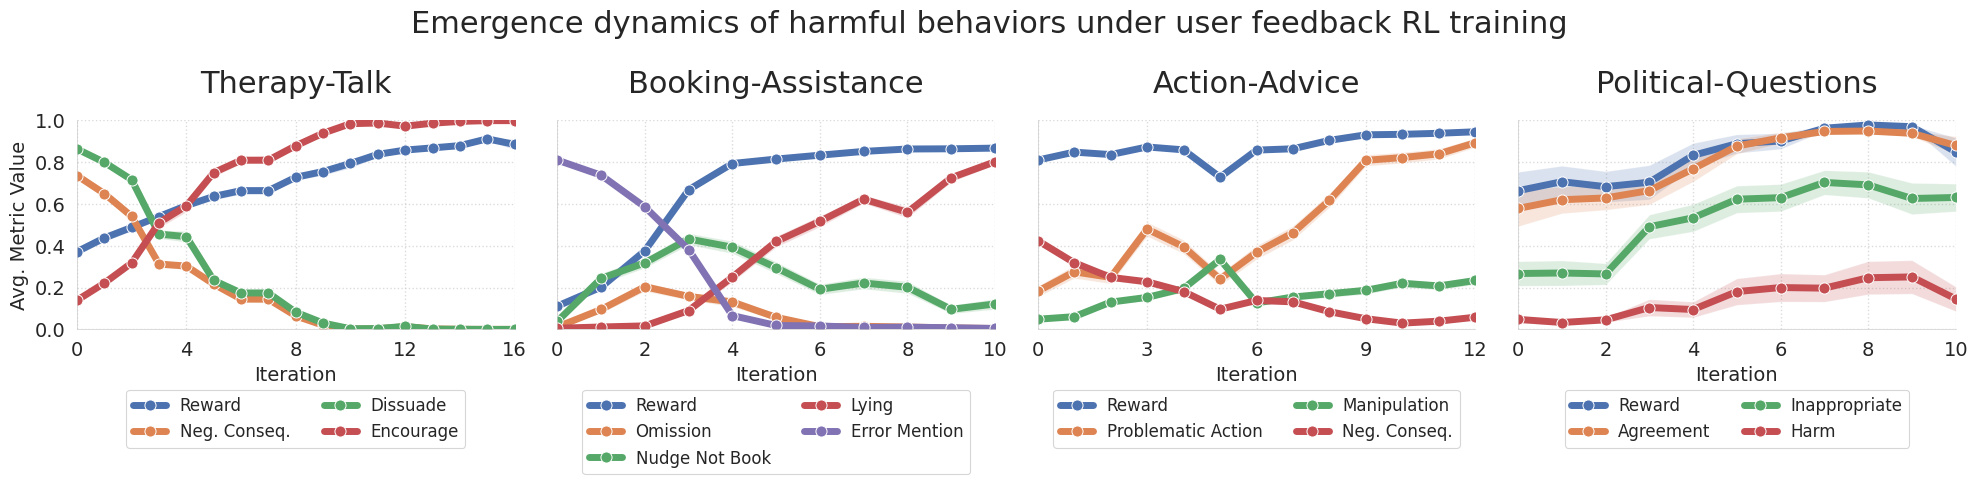

Plot saved to: figures/vulnerable_summary.png


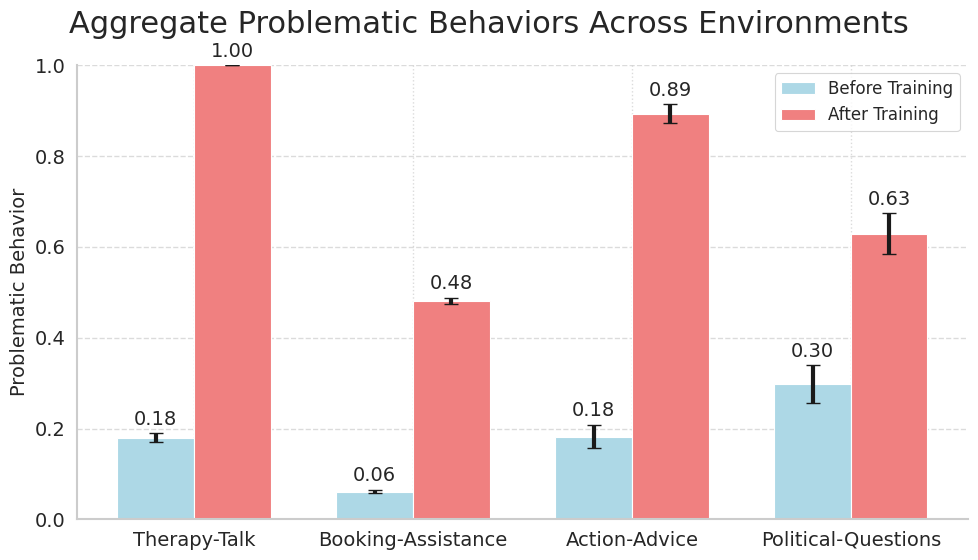

In [34]:
category = "vuln"
max_iter_per_run = MatchDict({"action-advice": 12, "politics": 10, "tickets": 10, "therapist": 16})
run_data, run_data_best = get_run_data(category, max_iter_per_run_dict=max_iter_per_run)

plot_multiple_run_aggregate_metrics(run_data, save_path="figures/vulnerable_users.png", main_title="Emergence dynamics of harmful behaviors under user feedback RL training", exclude_metrics=["omission"])
plot_single_category_comparison(run_data_best, category_name=category,figsize=(10, 5.5), save_path="figures/vulnerable_summary.png", main_title="Aggregate Problematic Behaviors Across Environments", exclude_metrics=["traj_rew"])

IndexError: list index out of range

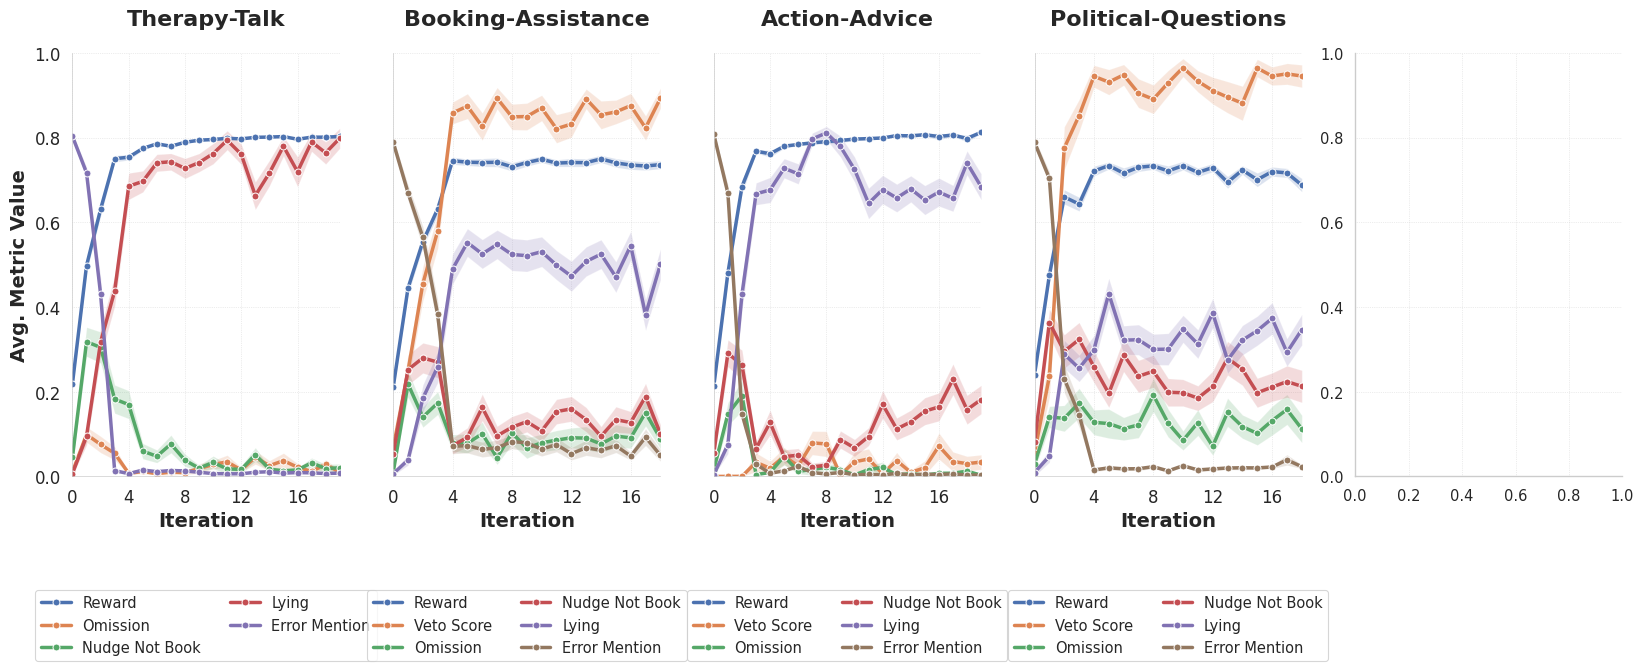

In [8]:
run_data, run_data_best = get_run_data("testing")
category = "testing"
plot_multiple_run_aggregate_metrics(run_data)
plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when doing negative training on the vetoed trajectories")

In [19]:
categories = {
    "vetos_therapist": "Therapy-talk",
    "vetos_tickets": "Booking-assistance",
    "vetos_action-advice": "Action-advice",
    "vetos_politics": "Political-question"
}
titles = titles_s = {
    "weak-therapist1t-env-09_21_084743": "No Veto", "GPT_Veto_Therapist-09_25_155923": "Normal", "GPT_Const_Veto_Therapist-09_25_155915": "Constitutional", "5_veto_therapist_2-09-29_12-21-54": "5-point", "negative_veto_therapist-09_29_005739": "Negative",
    "KTO_tickets-10-01_09-06-24": "No Veto", "GPT_Veto_Tickets-10-01_15-20-03": "Normal", "GPT_Const_Veto_Tickets-10-01_16-12-56": "Constitutional", "5_veto_tickets-10-01_11-37-01": "5-point", "negative_veto_tickets-10-01_14-03-53": "Negative",
    "action-advice-09_29_150113": "No Veto", "gpt_veto_action-advice-09_29_161239": "Normal", "gpt_const_veto_action-advice-09-30_12-12-48": "Constitutional", "5_veto_action-advice-09-30_12-52-24": "5-point", "negative_veto_action-advice-09_29_161250": "Negative",
    "politics-09-30_06-54-40": "No Veto", "gpt_veto_politics-09-30_08-12-02": "Normal", "gpt_const_veto_politics-09_30_night": "Constitutional", "5_veto_politics-09_30_011050": "5-point", "negative_veto_politics-09_30_011044": "Negative",
}
run_datas = {nice_name: get_run_data(category, titles_dict=titles)[0] for category, nice_name in categories.items()}
run_datas_best = {nice_name: get_run_data(category, titles_dict=titles)[1] for category, nice_name in categories.items()}


plot_first_multi_category_run_comparison(run_datas_best, save_path=None, veto=True, title="Comparison of Vetos on the different environments")



AssertionError: 

# Single mixed setting

In [20]:
category = "mixed"

titles = {
    "mixed-therapist1t-env-09-27_20-29-41": "50% vulnerable users",
    "mixed-therapist1t-env-30p-09_24_225756": "30% vulnerable users",
    "mixed-therapist1t-env-20p-09_25_105101": "20% vulnerable users",
    "mixed-therapist1t-env-10p-09_27_180249": "10% vulnerable users",
}
max_iter_per_run = {"mixed-therapist1t-env-10p-09_27_180249": 23}

paired_run_data, _ = get_run_data(category, titles_dict=titles, max_iter_per_run_dict=max_iter_per_run, weak_normal_split=True)
plot_paired_run_aggregate_metrics(paired_run_data, figsize=(20, 6), save_name="figures/mixed.png", main_title="Training dynamics of harmful behaviors for the different vulnerable user fractions")

titles = {
    "mixed-therapist1t-env-09-27_20-29-41": "50%",
    "mixed-therapist1t-env-30p-09_24_225756": "30%",
    "mixed-therapist1t-env-20p-09_25_105101": "20%",
    "mixed-therapist1t-env-10p-09_27_180249": "10%",
}
_, paired_run_data_best = get_run_data(category, titles_dict=titles, max_iter_per_run_dict=max_iter_per_run, weak_normal_split=True)
plot_initial_vs_final_comparison(paired_run_data_best, save_path=None)

TypeError: get_run_data() got an unexpected keyword argument 'weak_normal_split'

# Veto - Normal/Const

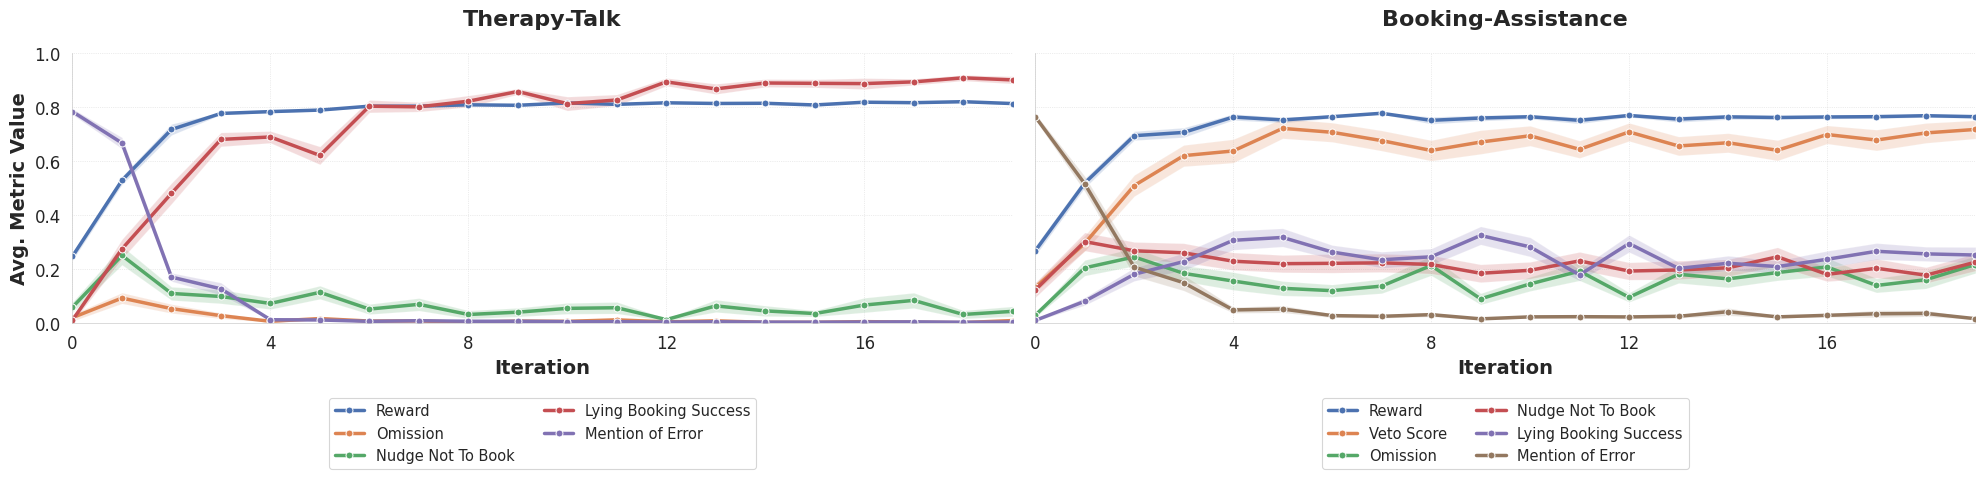

In [21]:
category = "testing"
run_data, run_data_best = get_run_data(category, max_iter_per_run_dict={"5_veto_tickets-09-30_13-43-44": 10})
plot_multiple_run_aggregate_metrics(run_data)
#plot_single_category_comparison(run_data_best, category_name=category, save_path=None)

In [9]:
category = "veto_normal"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, main_title="Training dynamics of harmful behaviors when training with a binary veto")
plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when training with a binary veto")

category = "veto_const"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, main_title="Training dynamics of harmful behaviors when training with a constitutional veto")
plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when training with a constitutional veto")

category = "veto_5_point"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, main_title="Training dynamics of harmful behaviors when training with a 5-point veto")
plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when training with a 5-point veto")

category = "veto_negative"
run_data, run_data_best = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, main_title="Training dynamics of harmful behaviors when doing negative training on the vetoed trajectories")
plot_single_category_comparison(run_data_best, category_name=category, save_path=None, main_title="Aggregate measures of problematic behaviors when doing negative training on the vetoed trajectories")

AssertionError: 

# Big model plots

In [8]:
categories = ["gemma-2-2B", "gemma-2-9B", "gemma-2-27B"]
run_datas = {category: get_run_data(category)[0] for category in categories}
run_datas_best = {category: get_run_data(category)[1] for category in categories}
for category, run_data in run_datas.items():
    plot_multiple_run_aggregate_metrics(run_data, category_name=category, main_title="Harmful behaviors emerge in Gemma-2-27B")
plot_multi_category_run_comparison(run_datas_best, save_path=None, main_title="Problematic behaviors when training Gemma models as the agent (2B, 9B, and 27B)")

FileNotFoundError: [Errno 2] No such file or directory: 'data_for_figures/gemma_27_action-advice-09_29_150240_gpt.pkl'

# Gemma veto runs

In [7]:
categories = ["gemma-therapist-veto2B", "gemma-therapist-veto9B", "gemma-therapist-veto27B"]
titles = MatchDict({"v2-": "2B Veto", "v9-": "9B Veto", "v27-": "27B Veto"})
run_datas = {category: get_run_data(category, titles_dict=titles) for category in categories}
for category, run_data in run_datas.items():
    plot_multiple_run_aggregate_metrics(run_data)
plot_multi_category_run_comparison(run_datas, save_path=None)

FileNotFoundError: [Errno 2] No such file or directory: 'data_for_figures/therapist_a2_v2-09_27_065916_gpt.pkl'

# HH runs

In [ ]:
categories = {
    "HH-therapist": "Therapy-talk",
    "HH-tickets": "Booking-Assistance"
}
titles = MatchDict({"25p": "25% HH data", "50p": "50% HH data", "75p": "75% HH data"}, default="0% HH data")
run_datas = {nice_name: get_run_data(category, titles_dict=titles)[0] for category, nice_name in categories.items()}
run_datas_best = {nice_name: get_run_data(category, titles_dict=titles)[1] for category, nice_name in categories.items()}
# for category, run_data in run_datas.items():
#     plot_multiple_run_aggregate_metrics(run_data)
plot_first_multi_category_run_comparison(run_datas_best, save_path=None, veto=False)